In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


pd.set_option("display.max_columns",None)
pd.set_option("display.width",500)
df = sns.load_dataset("titanic")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [3]:
def grab_col_names(dataframe, cat_th = 10, car_th = 20):
    # kategorik değişkken için olan bölüm
    cat_cols = [col for col in (df.columns) if str(df[col].dtypes) in ["category","object","bool"] ]
    num_but_cat = [col for col in df.columns if str(df[col].dtypes) in ["int64","float64"] and df[col].nunique() < 10]
    cat_but_car =[col for col in df.columns if str(df[col].dtypes) in  ["category","object","bool"] and df[col].nunique() > 10 ]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    # nümerik değşkenler için
    num_cols = [col for col in df.columns if str(df[col].dtype) in ["int64","float64"]]
    num_cols = [col for col in num_cols if col not in cat_cols]
    
    
    print(f"Observation: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"cum_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_but_cat: {len(num_but_cat)}")
    
    
    return cat_cols,num_cols,cat_but_car

In [4]:
grab_col_names(df)

Observation: 891
Variables: 15
cat_cols: 13
cum_cols: 2
cat_but_car: 0
num_but_cat: 4


(['sex',
  'embarked',
  'class',
  'who',
  'adult_male',
  'deck',
  'embark_town',
  'alive',
  'alone',
  'survived',
  'pclass',
  'sibsp',
  'parch'],
 ['age', 'fare'],
 [])

In [5]:
cat_cols,num_cols,cat_but_car = grab_col_names(df)

Observation: 891
Variables: 15
cat_cols: 13
cum_cols: 2
cat_but_car: 0
num_but_cat: 4


        sex      Ratio
male    577  64.758698
female  314  35.241302
##############################


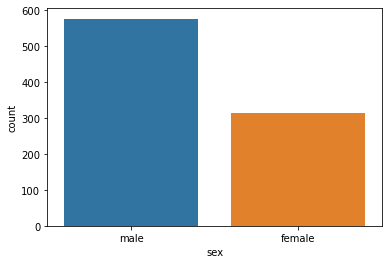

In [6]:
def cat_summary(dataframe,col_name, plot = False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                                                                  "Ratio":100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##############################")
    
    
    if plot:
        sns.countplot(x = dataframe[col_name], data = dataframe)
        plt.show(block = True)
cat_summary(df,"sex",plot = True)

In [7]:
for col in cat_cols:
    cat_summary(df,"sex")

        sex      Ratio
male    577  64.758698
female  314  35.241302
##############################
        sex      Ratio
male    577  64.758698
female  314  35.241302
##############################
        sex      Ratio
male    577  64.758698
female  314  35.241302
##############################
        sex      Ratio
male    577  64.758698
female  314  35.241302
##############################
        sex      Ratio
male    577  64.758698
female  314  35.241302
##############################
        sex      Ratio
male    577  64.758698
female  314  35.241302
##############################
        sex      Ratio
male    577  64.758698
female  314  35.241302
##############################
        sex      Ratio
male    577  64.758698
female  314  35.241302
##############################
        sex      Ratio
male    577  64.758698
female  314  35.241302
##############################
        sex      Ratio
male    577  64.758698
female  314  35.241302
##############################


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: age, dtype: float64


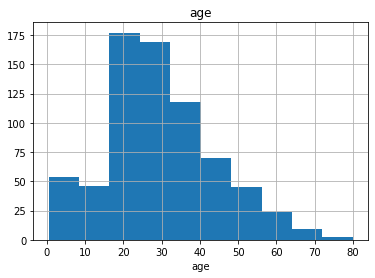

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
5%         7.225000
10%        7.550000
20%        7.854200
30%        8.050000
40%       10.500000
50%       14.454200
60%       21.679200
70%       27.000000
80%       39.687500
90%       77.958300
95%      112.079150
99%      249.006220
max      512.329200
Name: fare, dtype: float64


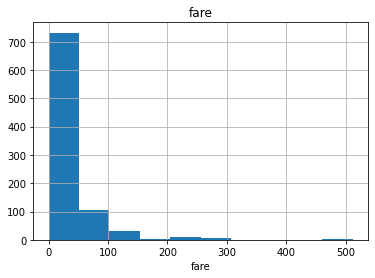

In [8]:
def num_summary(dataframe, numerical_col, plot = False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)
    
    if plot:
        dataframe[numerical_col].hist()
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block = True)
    


for col in num_cols:
    num_summary(df, col ,plot = True)

In [9]:
#bonus
df = sns.load_dataset("titanic")
for col in df.columns:
    if df[col].dtypes == "bool":
        df[col] = df[col].astype(int)

In [10]:
cat_cols,num_cols,cat_but_car = grab_col_names(df)

Observation: 891
Variables: 15
cat_cols: 11
cum_cols: 2
cat_but_car: 0
num_but_cat: 4


        sex      Ratio
male    577  64.758698
female  314  35.241302
##############################


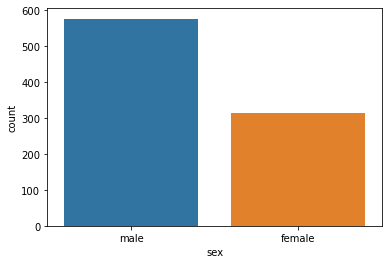

   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
##############################


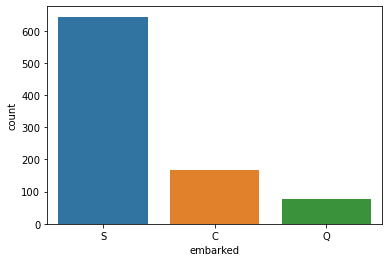

        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
##############################


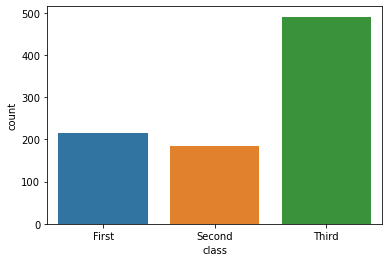

       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
##############################


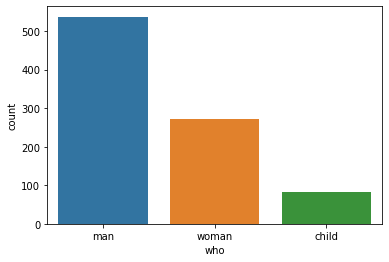

   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
##############################


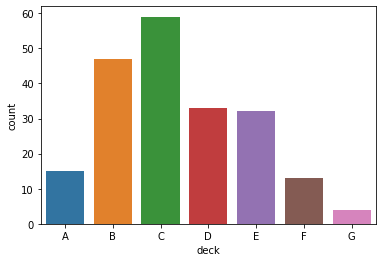

             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
##############################


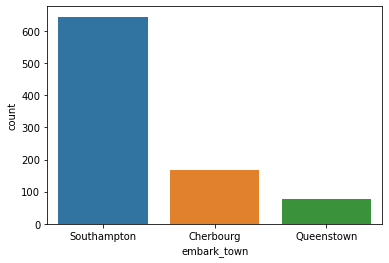

     alive      Ratio
no     549  61.616162
yes    342  38.383838
##############################


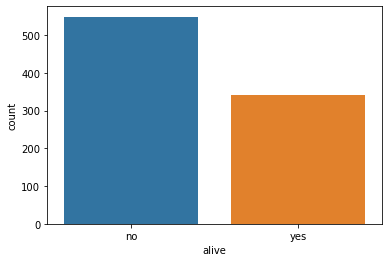

   survived      Ratio
0       549  61.616162
1       342  38.383838
##############################


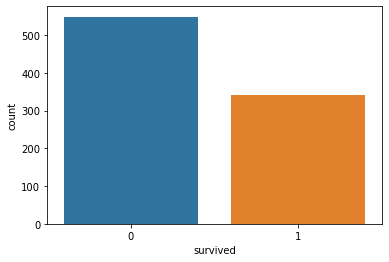

   pclass      Ratio
3     491  55.106622
1     216  24.242424
2     184  20.650954
##############################


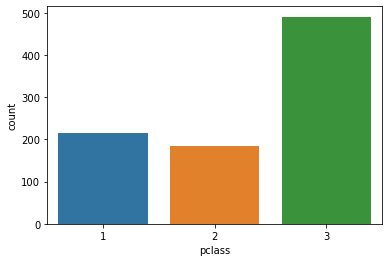

   sibsp      Ratio
0    608  68.237935
1    209  23.456790
2     28   3.142536
4     18   2.020202
3     16   1.795735
8      7   0.785634
5      5   0.561167
##############################


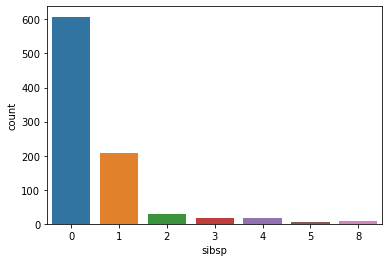

   parch      Ratio
0    678  76.094276
1    118  13.243547
2     80   8.978676
5      5   0.561167
3      5   0.561167
4      4   0.448934
6      1   0.112233
##############################


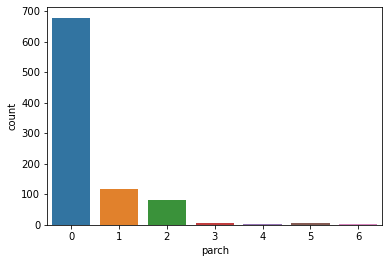

In [11]:
for col in cat_cols:
    cat_summary(df, col, plot = True)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: age, dtype: float64


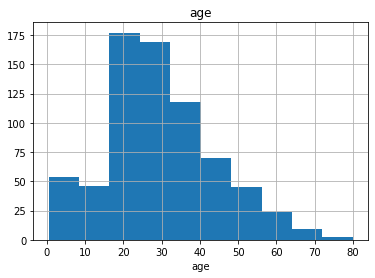

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
5%         7.225000
10%        7.550000
20%        7.854200
30%        8.050000
40%       10.500000
50%       14.454200
60%       21.679200
70%       27.000000
80%       39.687500
90%       77.958300
95%      112.079150
99%      249.006220
max      512.329200
Name: fare, dtype: float64


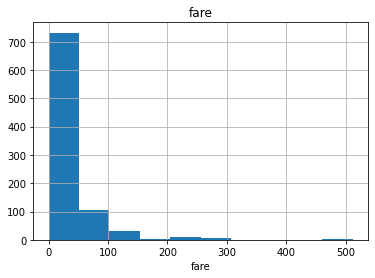

In [12]:
for col in num_cols:
    num_summary(df, col, plot = True)

# Hedef Değişken Analizi


In [13]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,1,NaN,Southampton,no,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,0,C,Cherbourg,yes,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,0,NaN,Southampton,yes,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,0,C,Southampton,yes,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,1,NaN,Southampton,no,1


In [14]:
df["survived"].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [15]:
cat_summary(df,"survived")

   survived      Ratio
0       549  61.616162
1       342  38.383838
##############################


In [16]:
#Hedef değişkenlerin kategorik değişkenler için analizi

In [17]:
df.groupby("sex")["survived"].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [20]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}))

In [21]:
target_summary_with_cat(df, "survived", "sex")

        TARGET_MEAN
sex                
female     0.742038
male       0.188908


In [22]:
target_summary_with_cat(df, "survived", "pclass")

        TARGET_MEAN
pclass             
1          0.629630
2          0.472826
3          0.242363


In [23]:
for col in cat_cols:
    target_summary_with_cat(df, "survived", col)

        TARGET_MEAN
sex                
female     0.742038
male       0.188908
          TARGET_MEAN
embarked             
C            0.553571
Q            0.389610
S            0.336957
        TARGET_MEAN
class              
First      0.629630
Second     0.472826
Third      0.242363
       TARGET_MEAN
who               
child     0.590361
man       0.163873
woman     0.756458
      TARGET_MEAN
deck             
A        0.466667
B        0.744681
C        0.593220
D        0.757576
E        0.750000
F        0.615385
G        0.500000
             TARGET_MEAN
embark_town             
Cherbourg       0.553571
Queenstown      0.389610
Southampton     0.336957
       TARGET_MEAN
alive             
no               0
yes              1
          TARGET_MEAN
survived             
0                   0
1                   1
        TARGET_MEAN
pclass             
1          0.629630
2          0.472826
3          0.242363
       TARGET_MEAN
sibsp             
0         0.345395
1      

In [24]:
#Hedef değişkenin sayısal değişkenler ile analizi

In [25]:
df.groupby("survived")["age"].mean()

survived
0    30.626179
1    28.343690
Name: age, dtype: float64

In [26]:
df.groupby("survived").agg({"age":"mean"})

,age
survived,
0,30.626179
1,28.343690


In [35]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(pd.DataFrame(dataframe.groupby(target)
                       .agg({numerical_col:"mean"})))








target_summary_with_num(df, "survived", "age")

                age
survived           
0         30.626179
1         28.343690


In [36]:
for col in num_cols:
    target_summary_with_num(df, "survived", col)

                age
survived           
0         30.626179
1         28.343690
               fare
survived           
0         22.117887
1         48.395408
